# CNN Model for Tumour Classification
## B. Multiclass task
### Build a classifier to identify the type of tumor in each MRI image (meningioma tu-
### mor, glioma tumor, pituitary tumor or no tumor).

Import necessary library including tensorflow, keras, numpy, pandas, sklearn, matplotlib and os module

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
from pandas import *
import pandas as pd
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from os import path

Read label.csv and define image data folder path

In [2]:
csv_array = pd.read_csv('./dataset/label.csv')

dir_image = "./dataset/image/"
dir_img256 = "./dataset/image256/"

if path.exists(dir_img256) == 'false':
    os.makedirs(dir_img256)

Read MRI data in; Reduce resolution to 256*256; Normalised data to range 0 to 1;
Split data into training set and testing set by a ratio of 9:1

In [3]:
num_imgs,height,width = (3000, 256, 256)   #dimensions for image size reduction;

imgs = np.zeros((num_imgs,height,width,3)) #imgs to store
labels = np.zeros((num_imgs,1))

################################################################################
##
##                 Resize 512*512 images to 256*256 
##
##                Not needed if images already reduced
################################################################################
#from PIL import Image                 #Import PIL for image size reduction

#basewidth = 256                       #Target image width; original width is 512
#img = Image.open("/Users/kuiwang/Documents/Applied ML Systems/FinalAssignment/dataset/image/IMAGE_0000.jpg")
#wpercent = float(basewidth) / float(img.size[0])
#hsize = int((float(img.size[1]) * float(wpercent)))    #calculated target image height

#for i in range(rows):                 #Reduce every image's size and save them in 'small_img' folder
#    img = Image.open(dir_image + csv_array.file_name[i])
#    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
#    img.save(dir_img256 + csv_array.file_name[i])
################################################################################

#read 256*256 images into imgs
for i in range(num_imgs):
    #imgs[i] = mpimg.imread(dir_image + csv_array.file_name[i])
    imgs[i] = mpimg.imread(dir_img256 + csv_array.file_name[i])
print(imgs.shape)

##split images into training data and testing data by 9:1
train_images = imgs[0:2700]
test_images = imgs[2700:3000]
print(train_images.shape)
print(test_images.shape)

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Modify string label to numbers
for i in range(3000):
    if csv_array.label[i] == 'no_tumor':
        labels[i][0] = 0
    if csv_array.label[i] == 'meningioma_tumor':
        labels[i][0] = 1
    if csv_array.label[i] == 'glioma_tumor':
        labels[i][0] = 2
    if csv_array.label[i] == 'pituitary_tumor':
        labels[i][0] = 3

#split lables into training label and testing label by 9:1
train_labels = labels[0:2700]
print(train_labels.shape)
test_labels = labels[2700:3000]

(3000, 256, 256, 3)
(2700, 256, 256, 3)
(300, 256, 256, 3)
(2700, 1)


Plot 25 MRI data to view them.

/Users/kuiwang/opt/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


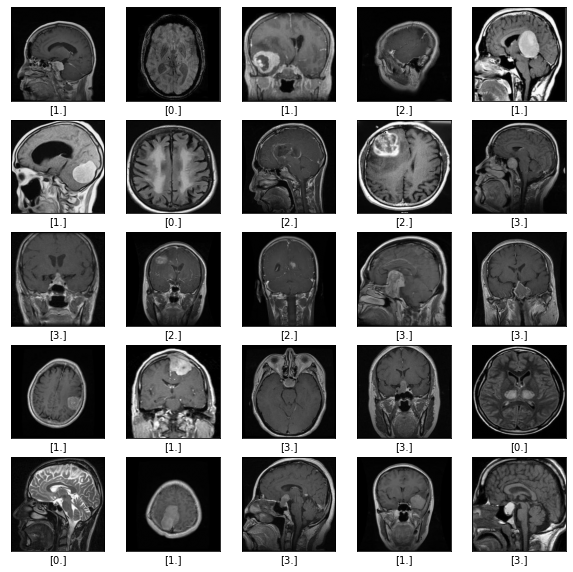

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

Build CNN model by adding conv2D and MaxPooling2D layers

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(32, (5, 5),activation='relu'))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Conv2D(32, (5, 5),activation='relu'))
#model.add(layers.MaxPooling2D((3, 3)))
#model.add(layers.Conv2D(32, (7, 7),activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(32, (7, 7)))

2021-12-17 16:39:23.216249: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-17 16:39:23.216719: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        25632     
Total params: 52,160
Trainable params: 52,160
Non-trainable params: 0
_________________________________________________________________


Add flatten and dense layers to CNN model

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                2

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Train on 2700 samples, validate on 300 samples
Epoch 1/50
2700/2700 [==============================] - 232s 86ms/sample - loss: 1.0452 - accuracy: 0.5467 - val_loss: 1.0779 - val_accuracy: 0.5033
Epoch 2/50
2700/2700 [==============================] - 230s 85ms/sample - loss: 0.7815 - accuracy: 0.6767 - val_loss: 0.8754 - val_accuracy: 0.6433
Epoch 3/50
2700/2700 [==============================] - 233s 86ms/sample - loss: 0.5708 - accuracy: 0.7733 - val_loss: 0.6233 - val_accuracy: 0.7800
Epoch 4/50
2700/2700 [==============================] - 222s 82ms/sample - loss: 0.4186 - accuracy: 0.8496 - val_loss: 0.4764 - val_accuracy: 0.8133
Epoch 5/50
2700/2700 [==============================] - 233s 86ms/sample - loss: 0.2652 - accuracy: 0.9019 - val_loss: 0.5472 - val_accuracy: 0.8167
Epoch 6/50
2700/2700 [==============================] - 235s 87ms/sample - loss: 0.1973 - accuracy: 0.9270 - val_loss: 0.4646 - val_accuracy: 0.8233
Epoch 7/50
2700/2700 [==============================] - 229

300/1 - 11s - loss: 0.3924 - accuracy: 0.9100


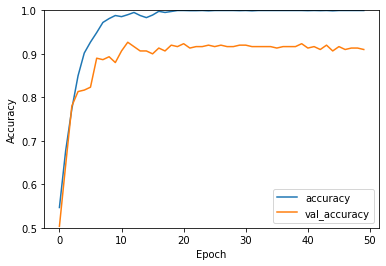

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

The following code is to test the new data set!

In [11]:
csv_array = pd.read_csv('./test-2/label.csv')

dir_image = "./test-2/image/"
dir_img256 = "./test-2/image256/"

if path.exists(dir_img256) == 'false':
    os.makedirs(dir_img256)

rows= 200

num_imgs,height,width = (200, 256, 256)   #dimensions for image size reduction;

imgs = np.zeros((num_imgs,height,width,3)) #imgs to store
labels = np.zeros((num_imgs,1))

from PIL import Image                 #Use PIL for image size reduction

basewidth = 256                       #Target image width is 256; original width is 512
img = Image.open("./test-2/image/IMAGE_0000.jpg")
wpercent = float(basewidth) / float(img.size[0])       #use "256/512" as resize ratio (wpercent)
hsize = int((float(img.size[1]) * float(wpercent)))    #calculated target image height using resize ratio (wpercent)

for i in range(rows):                 #Reduce every image's size and save them in 'dir_img256' folder
    img = Image.open(dir_image + csv_array.file_name[i])
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img.save(dir_img256 + csv_array.file_name[i])

for i in range(rows):                 #Read every resized image and reduce it from RGB to grayscale format. Transform it to 1-d array. Store all images in a 2-d array, imgs. 
    imgs[i] = mpimg.imread(dir_img256 + csv_array.file_name[i])
print(imgs.shape)

test_images = imgs
print(test_images.shape)

# Normalize pixel values to be between 0 and 1
test_images = test_images / 255.0

# Modify string label to numbers
for i in range(200):
    if csv_array.label[i] == 'no_tumor':
        labels[i][0] = 0
    if csv_array.label[i] == 'meningioma_tumor':
        labels[i][0] = 1
    if csv_array.label[i] == 'glioma_tumor':
        labels[i][0] = 2
    if csv_array.label[i] == 'pituitary_tumor':
        labels[i][0] = 3

test_labels = labels[0:200]

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

(200, 256, 256, 3)
(200, 256, 256, 3)
200/1 - 8s - loss: 0.2539 - accuracy: 0.9100
